In [56]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# One-dimensional sample

In [57]:
df = pd.read_csv("1.txt", header=None, names=['x'])
print(df.shape)
df.head()

(50, 1)


,x
0,1
1,3
2,1
3,5
4,5


In [58]:
df.value_counts() # Frequency

x
1    12
2     9
3     9
4     7
5     7
6     6
dtype: int64

array([[<AxesSubplot:title={'center':'x'}>]], dtype=object)

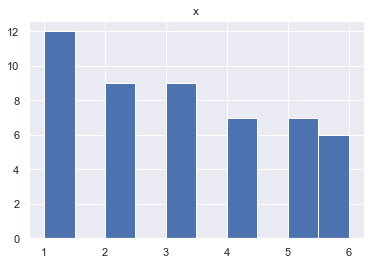

In [59]:
df.hist()

In [66]:
df['x^2'] = df['x'] ** 2
df['x^2'].mean()

12.64

In [65]:
print("Mean:", df['x'].mean(), "Variance:", (df['x'].std()**2), "Std:", df['x'].std(), "Mode:", df['x'].mode()[0], "Median:", df['x'].median())

Mean: 3.12 Variance: 2.9648979591836735 Std: 1.721887905522213 Mode: 1 Median: 3.0


In [67]:
12.64 - 3.12 ** 2

2.9055999999999997

# Two-dimensional sample

In [34]:
df = pd.read_csv("2.txt", delimiter=';')
print(df.shape)
df.head()

(10, 2)


,x,y
0,-2,2
1,-1,3
2,0,5
3,1,8
4,2,10


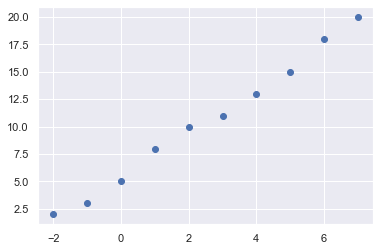

In [41]:
plt.scatter(df['x'], df['y'], marker='o')

In [35]:
df["$x^2$"] = df["x"] ** 2
df["$y^2$"] = df["y"] ** 2
df["xy"] = df["x"] * df["y"]
df_Total = df.copy()
df_Total.loc['Total']= df.sum(numeric_only=True, axis=0)

In [36]:
df_Total

,x,y,$x^2$,$y^2$,xy
0,-2,2,4,4,-4
1,-1,3,1,9,-3
2,0,5,0,25,0
3,1,8,1,64,8
4,2,10,4,100,20
5,3,11,9,121,33
6,4,13,16,169,52
7,5,15,25,225,75
8,6,18,36,324,108
9,7,20,49,400,140


In [51]:
a = np.array([[145, 25], [25, 10]])
b = np.array([429, 105])
x = np.linalg.solve(a, b)
k, b = x

In [52]:
print(x)

[2.01818182 5.45454545]


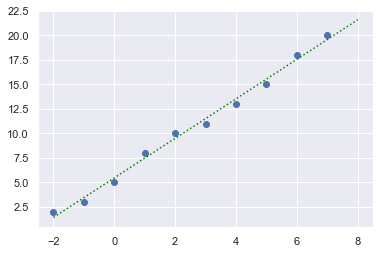

In [53]:
plt.scatter(df['x'], df['y'], marker='o')
x = np.linspace(-2, 8, 10)
y = k * x + b
plt.plot(x, y, ':', color='green')

# Two-dimentsional data with frequency

In [113]:
df = pd.read_csv("3.txt", delimiter=';')
print(df.shape)
df.head()

(13, 3)


,x,y,count
0,20,16,8
1,25,16,12
2,20,20,1
3,25,20,9
4,30,20,11


In [103]:
#c1, h1, c2, h2 = 30, 5, 36, 10
c1, h1, c2, h2 = 30, 5, 24, 4
df['x'] = (df['x'] - c1) / h1
df['y'] = (df['y'] - c2) / h2
df.head()

,x,y,count
0,-2.0,-2.0,8
1,-1.0,-2.0,12
2,-2.0,-1.0,1
3,-1.0,-1.0,9
4,0.0,-1.0,11


In [114]:
n = df['count'].sum()
print("Size:", n)

Size: 100


In [115]:
x_mean = (df['x'] * df['count']).sum() / n
y_mean = (df['y'] * df['count']).sum() / n
print('x_mean:', x_mean, 'y_mean:', y_mean)

x_mean: 30.35 y_mean: 22.84


In [116]:
x_mean2 = ((df['x'] ** 2) * df['count']).sum() / n
y_mean2 = ((df['y'] ** 2) * df['count']).sum() / n
print('x_mean2:', x_mean2, 'y_mean2:', y_mean2)

x_mean2: 954.25 y_mean2: 543.2


In [117]:
x_sigma = np.sqrt(x_mean2 - x_mean ** 2)
y_sigma = np.sqrt(y_mean2 - y_mean ** 2)
print('x_sigma:', x_sigma, 'y_sigma:', y_sigma)

x_sigma: 5.755649398634349 y_sigma: 4.640517212552929


In [118]:
xy = (df['x'] * df['y'] * df['count']).sum()
print('xy:', xy)

xy: 71580


In [119]:
rb = (xy - n * x_mean * y_mean) / (n * x_sigma * y_sigma)
print('rb:', rb)

rb: 0.8463753454208464


In [120]:
# y - y_mean = rb * y_sigma / x_sigma * (x - x_mean)
k = rb * y_sigma / x_sigma
b = k * (-x_mean) + y_mean
print(k, b)

0.6823937816013916 2.129348728397762


In [122]:
k = 0.847 * 4.64 / 5.75
b = 0.68 * (-30.35) + 22.84
print(k, b)

0.6834921739130434 2.201999999999998
